In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("cleaned_churn_data.csv")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3333 non-null   int64  
 1   account length               3333 non-null   int64  
 2   international plan           3333 non-null   int64  
 3   voice mail plan              3333 non-null   int64  
 4   number vmail messages        3333 non-null   int64  
 5   total day minutes            3333 non-null   float64
 6   total day calls              3333 non-null   int64  
 7   total day charge             3333 non-null   float64
 8   total eve minutes            3333 non-null   float64
 9   total eve calls              3333 non-null   int64  
 10  total eve charge             3333 non-null   float64
 11  total night minutes          3333 non-null   float64
 12  total night calls            3333 non-null   int64  
 13  total night charge

In [69]:
df.drop(columns=['Unnamed: 0'], axis = 1, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   account length               3333 non-null   int64  
 1   international plan           3333 non-null   int64  
 2   voice mail plan              3333 non-null   int64  
 3   number vmail messages        3333 non-null   int64  
 4   total day minutes            3333 non-null   float64
 5   total day calls              3333 non-null   int64  
 6   total day charge             3333 non-null   float64
 7   total eve minutes            3333 non-null   float64
 8   total eve calls              3333 non-null   int64  
 9   total eve charge             3333 non-null   float64
 10  total night minutes          3333 non-null   float64
 11  total night calls            3333 non-null   int64  
 12  total night charge           3333 non-null   float64
 13  total intl minutes

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## KNN - f1 is about 0.62

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
X = df.drop(columns=['churn'], axis = 1)
y = df['churn']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [75]:
len(y_test)

834

In [76]:
knn_default = KNeighborsClassifier()

In [77]:
knn_default.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
print(confusion_matrix(y_test, knn_default.predict(X_test)))
print(classification_report(y_test, knn_default.predict(X_test)))

[[696  24]
 [ 80  34]]
              precision    recall  f1-score   support

       False       0.90      0.97      0.93       720
        True       0.59      0.30      0.40       114

    accuracy                           0.88       834
   macro avg       0.74      0.63      0.66       834
weighted avg       0.85      0.88      0.86       834



In [79]:
param_grid = {
    'n_neighbors' : [5, 7, 9, 11],
    'weights' : ['distance', 'uniform']
}

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
kn_grid = GridSearchCV(estimator= KNeighborsClassifier(), param_grid=param_grid)

In [82]:
kn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 11],
                         'weights': ['distance', 'uniform']})

In [83]:
kn_grid.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [84]:
print(confusion_matrix(y_test, kn_grid.predict(X_test)))
print(classification_report(y_test, kn_grid.predict(X_test), target_names= ['not churn', 'churn']))

[[709  11]
 [ 87  27]]
              precision    recall  f1-score   support

   not churn       0.89      0.98      0.94       720
       churn       0.71      0.24      0.36       114

    accuracy                           0.88       834
   macro avg       0.80      0.61      0.65       834
weighted avg       0.87      0.88      0.86       834



In [85]:
from sklearn.metrics import plot_confusion_matrix

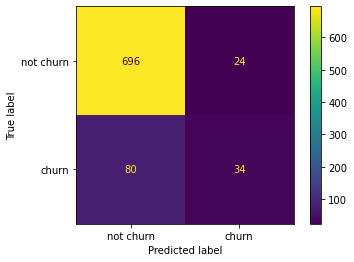

In [86]:
plot_confusion_matrix(knn_default, X_test, y_test, display_labels= ['not churn', 'churn'])

1. **Recall is very high for one class and low for other class
2. Precision has good performance overall
3. F1 scores are imbalanced
4. Accuracy looks good but mostly due to class imbalance.**


## Decision Trees - f1 score of 0.86

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtree_default = DecisionTreeClassifier()

In [89]:
dtree_default.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
print(classification_report(y_train, dtree_default.predict(X_train)))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2130
        True       1.00      1.00      1.00       369

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499



In [90]:
print(confusion_matrix(y_test, dtree_default.predict(X_test)))
print(classification_report(y_test, dtree_default.predict(X_test)))

[[673  47]
 [ 30  84]]
              precision    recall  f1-score   support

       False       0.96      0.93      0.95       720
        True       0.64      0.74      0.69       114

    accuracy                           0.91       834
   macro avg       0.80      0.84      0.82       834
weighted avg       0.91      0.91      0.91       834



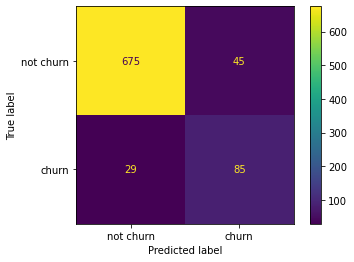

In [36]:
plot_confusion_matrix(dtree_default, X_test, y_test, display_labels= ['not churn', 'churn'])

In [96]:
dtree_default.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

Initial max_depth value is chosen using the baseline tree and its performance. If baseline is overfit, you need a max_depth lower than the baseline. If its underfit, you need a max_depth a little bit higher than the baseline.


Can check the baseline max_depth using 
model_name.get_depth() (use print(model_name.param_name) for other parameter.)

In this case, baseline decision tree had a 100% performance and max_depth of 21 for the training set

For the test set, accuracy was only 91% hence a little overfit.

That leads me to conclude I need to reduce max_depth a little from my baseline.

I decided to try a max value of 18 dfor max_depth.

1st round of gridsearch for max_depth = 9,18 => 9
2nd round of gridsearch for max_depth = 5,7,9,11 => 7

Max value for min_samples_leaf = 35

Max value for min_samples_split = 2*min_samples_leaf = 70

If you find your model exceeding these values, increase the max_depth a little

In [107]:
print(dtree_default.get_depth())

21


In [37]:
from sklearn.tree import plot_tree

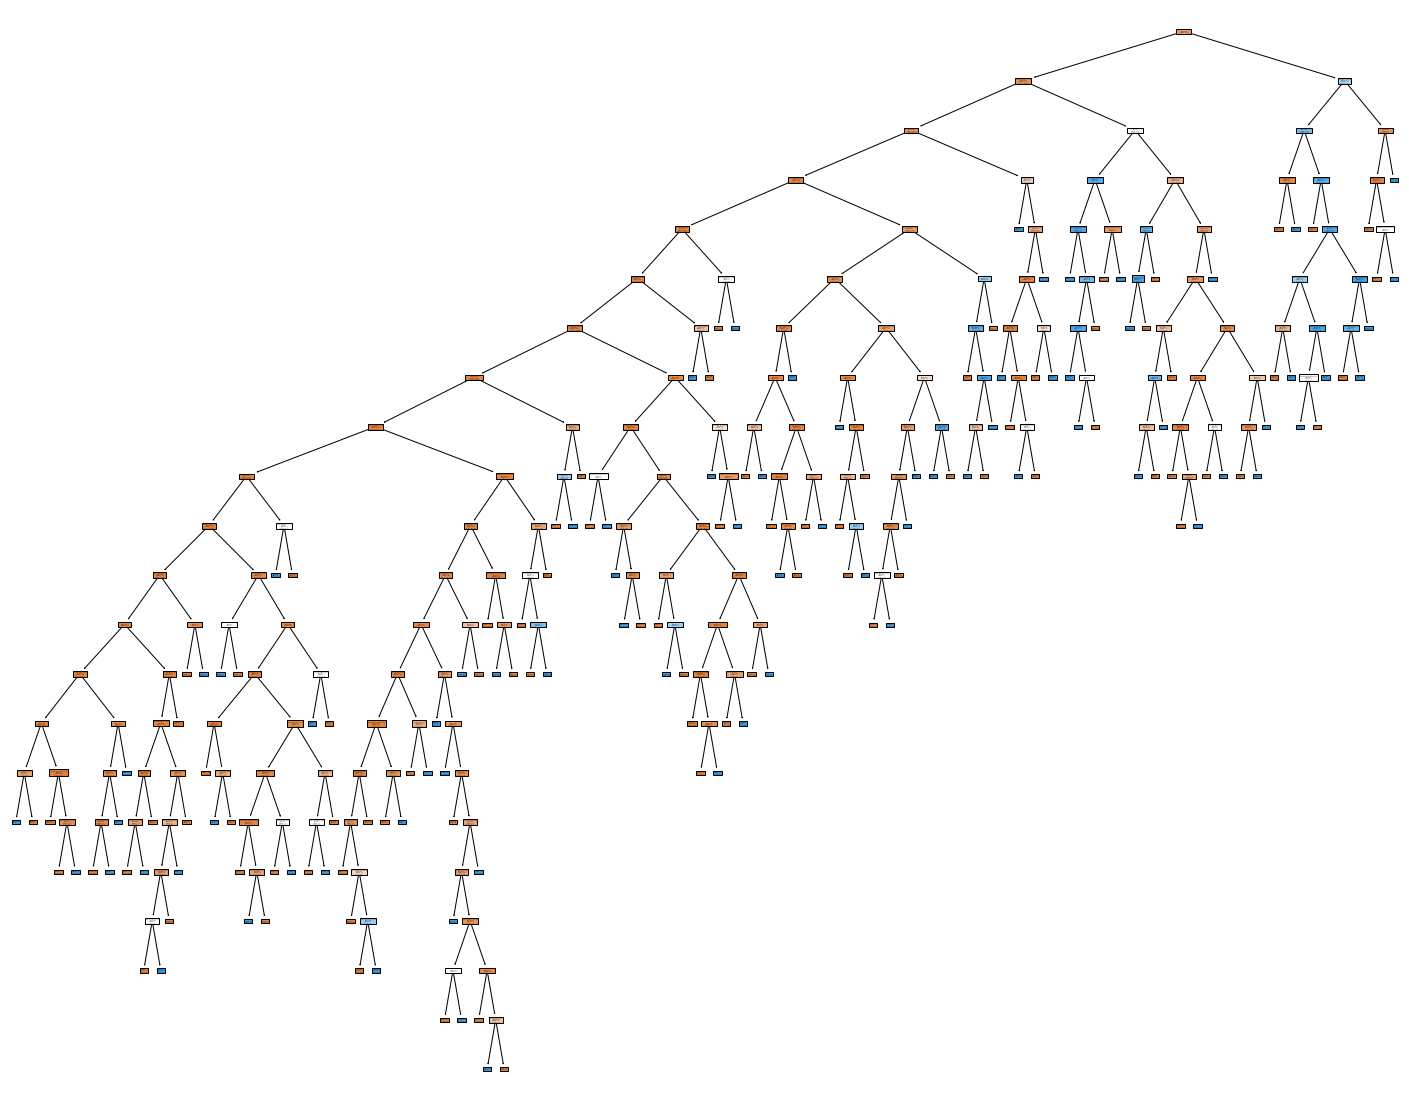

In [38]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtree_default, 
                   feature_names=X.columns,
                   filled=True)

In [39]:
dtree_param_grid = {
    'max_depth' : [7, 8, 9, 10, 11, 12],
    'min_samples_leaf' : [2, 3, 4, 5, 6, 7],
    'min_samples_split' : [2, 3, 4, 5, 6, 7],
    'class_weight' : ['balanced']
}

In [40]:
dtree_grid = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=dtree_param_grid, scoring = 'recall')

In [41]:
dtree_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='recall')

In [42]:
dtree_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [43]:
print(confusion_matrix(y_test, dtree_grid.predict(X_test)))
print(classification_report(y_test, dtree_grid.predict(X_test)))

[[658  62]
 [ 21  93]]
              precision    recall  f1-score   support

       False       0.97      0.91      0.94       720
        True       0.60      0.82      0.69       114

    accuracy                           0.90       834
   macro avg       0.78      0.86      0.82       834
weighted avg       0.92      0.90      0.91       834



In [44]:
type(dtree_grid.best_estimator_)

sklearn.tree._classes.DecisionTreeClassifier

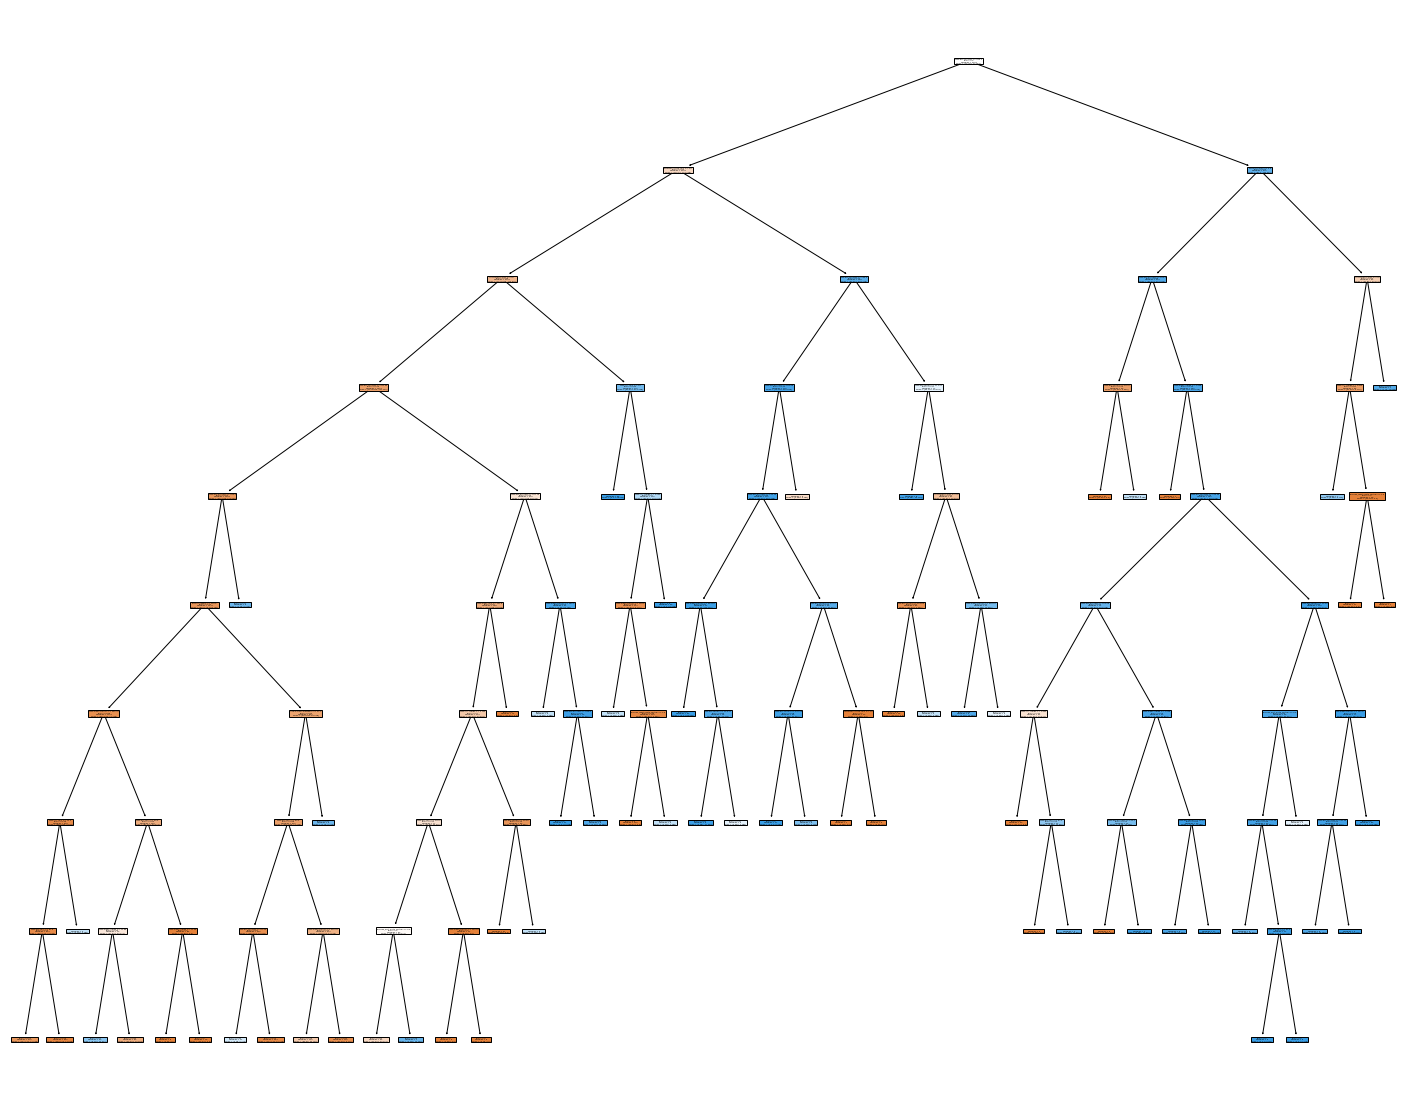

In [45]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtree_grid.best_estimator_, 
                   feature_names=X.columns,
                   filled=True)

In [46]:
classification_report(y_test, dtree_default.predict(X_test))

'              precision    recall  f1-score   support\n\n       False       0.96      0.94      0.95       720\n        True       0.65      0.75      0.70       114\n\n    accuracy                           0.91       834\n   macro avg       0.81      0.84      0.82       834\nweighted avg       0.92      0.91      0.91       834\n'

In [47]:
y.value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

## Using SMOTE for dealing with class imbalance

In [48]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
sm = SMOTE(random_state= 42)

In [52]:
X_resampled_train, y_resampled_train = sm.fit_resample(X_train, y_train)

In [54]:
y_resampled_train.value_counts()

True     2130
False    2130
Name: churn, dtype: int64

In [55]:
dtree_resampled = DecisionTreeClassifier()

In [56]:
dtree_resampled.fit(X_resampled_train, y_resampled_train)

DecisionTreeClassifier()

In [57]:
print(confusion_matrix(y_test, dtree_resampled.predict(X_test)))
print(classification_report(y_test, dtree_resampled.predict(X_test)))

[[656  64]
 [ 25  89]]
              precision    recall  f1-score   support

       False       0.96      0.91      0.94       720
        True       0.58      0.78      0.67       114

    accuracy                           0.89       834
   macro avg       0.77      0.85      0.80       834
weighted avg       0.91      0.89      0.90       834



In [58]:
dtree_param_grid1 = {
    'max_depth' : [8, 9, 10, 11, 12],
    'min_samples_leaf' : [4, 5],
    'min_samples_split' : [4, 5]
}

In [59]:
dtree_resampled_grid = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=dtree_param_grid1)

In [60]:
dtree_resampled_grid.fit(X_resampled_train, y_resampled_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10, 11, 12],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [4, 5]})

In [61]:
dtree_resampled_grid.best_params_

{'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 4}

In [63]:
print(confusion_matrix(y_test, dtree_resampled_grid.predict(X_test)))
print(classification_report(y_test, dtree_resampled_grid.predict(X_test)))

[[598 122]
 [ 20  94]]
              precision    recall  f1-score   support

       False       0.97      0.83      0.89       720
        True       0.44      0.82      0.57       114

    accuracy                           0.83       834
   macro avg       0.70      0.83      0.73       834
weighted avg       0.89      0.83      0.85       834



<AxesSubplot:>

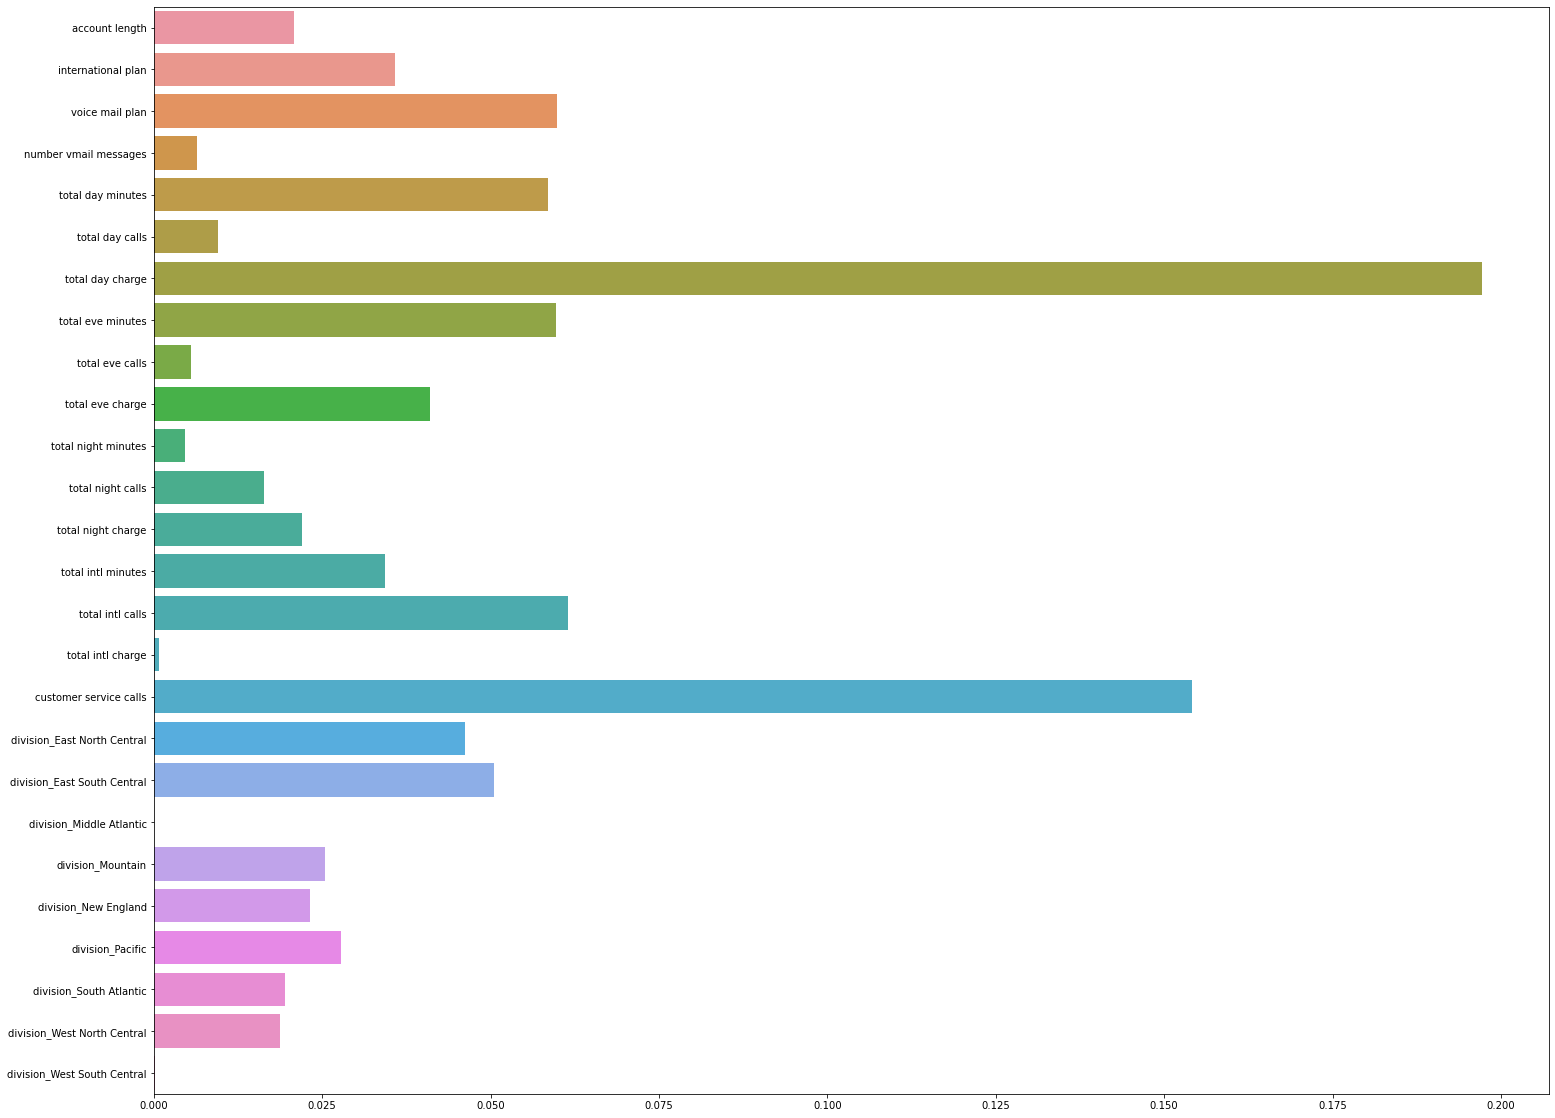

In [65]:
plt.figure(figsize=(25,20))
sns.barplot(x = dtree_resampled_grid.best_estimator_.feature_importances_, 
            y = X_resampled_train.columns)

<AxesSubplot:xlabel='churn', ylabel='total day minutes'>

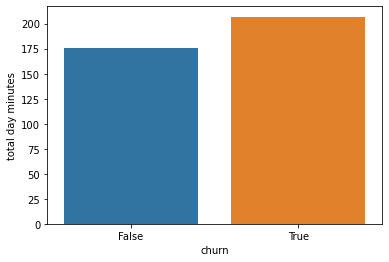

In [70]:
sns.barplot(y = 'total day minutes', x = 'churn', data = df.groupby(by='churn').agg('mean').reset_index())

In [67]:
df.groupby(by='churn').agg('mean')['total day minutes']

churn
False    175.175754
True     206.914079
Name: total day minutes, dtype: float64

In [ ]:
def build_model(model, train_x, train_y):
     model.fit()
        
def evaluate_model(model, test_x, test_y):
    model = build_model(model)
    print(classification_report)
    print(classification_report)
    print(confusion_matrix)
    print(confusion_matrix)
    